In [1]:
# NYC AirBnB dataset. Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
# importing dataset as a pandas library
data = pd.read_csv('AB_NYC_2019.csv')
# explore what the data looks like
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# how big is the dataset
len(data)

48895

In [4]:
# type of each of the columns
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
# data cleaning
# there are already a few NaN values so we are going to look further into that
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# name and host name do not need to be in the exploration, also there is the possibility that it is unethical
# we drop columns id, name, host_name
data.drop(['id', 'host_name', 'last_review'], axis = 1, inplace = True)
data.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [10]:
#reviews per month NaN values may be replace by 0
data.fillna({'reviews_per_month':0}, inplace = True)
data.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [23]:
# since neighbourhoods are important it would be good to know how many there are
set(data.neighbourhood_group)

{'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'}

In [24]:
# also looking into the neighbourhood column
data.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [25]:
# room type
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [30]:
# now we will explore column by column from left to right, for no particular reason
top_hosts = data.host_id.value_counts().head(10)
top_hosts

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643')]

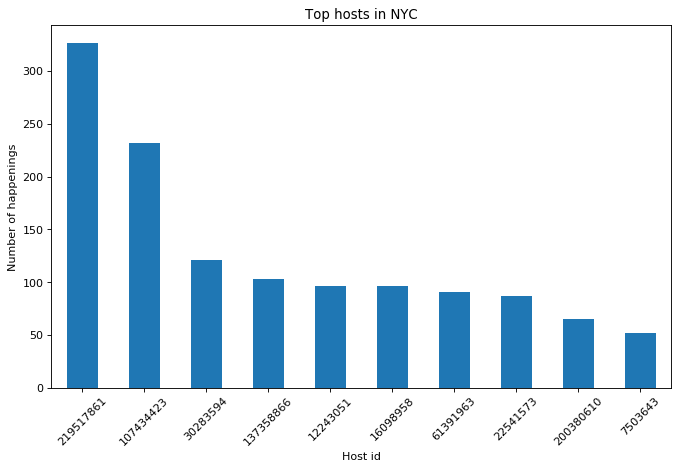

In [46]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
top_host_fig = top_hosts.plot(kind = 'bar')
top_host_fig.set_title('Top hosts in NYC')
top_host_fig.set_xlabel('Host id')
top_host_fig.set_ylabel('Number of happenings')
top_host_fig.set_xticklabels(top_host_fig.get_xticklabels(), rotation=45)

In [137]:
# creating a series of dataframes with the neighbourhood name and prices. It is done like this to 
# avoid problems with different lengths of data in prices. Gaps are filled in with NaN which is ignored by .describe()
df1 = pd.DataFrame({'Bronx':data.loc[data['neighbourhood_group'] == 'Bronx']['price'].values})
df2 = pd.DataFrame({'Brooklyn':data.loc[data['neighbourhood_group'] == 'Brooklyn']['price'].values})
df3 = pd.DataFrame({'Manhattan':data.loc[data['neighbourhood_group'] == 'Manhattan']['price'].values})
df4 = pd.DataFrame({'Queens':data.loc[data['neighbourhood_group'] == 'Queens']['price'].values})
df5 = pd.DataFrame({'Staten Island':data.loc[data['neighbourhood_group'] == 'Staten Island']['price'].values})
nhood_price = pd.concat([df1,df2,df3,df4,df5], ignore_index = True, axis = 1)
nhood_price.columns = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
nhood_price.describe()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
count,1091.000000,20104.000000,21661.000000,5666.000000,373.000000
mean,87.496792,124.383207,196.875814,99.517649,114.812332
std,106.709349,186.873538,291.383183,167.102155,277.620403
min,0.000000,0.000000,0.000000,10.000000,13.000000
25%,45.000000,60.000000,95.000000,50.000000,50.000000
50%,65.000000,90.000000,150.000000,75.000000,75.000000
75%,99.000000,150.000000,220.000000,110.000000,110.000000
max,2500.000000,10000.000000,10000.000000,10000.000000,5000.000000


In [139]:
# there are a few very extreme values which would need to be removed for visualisation
# first create a new dataframe where prices over 600 have been removed
data_no_extreme_price = data[data.price < 600]
len(data_no_extreme_price), len(data)

(48036, 48895)

In [140]:
# creating a series of dataframes with the neighbourhood name and prices. It is done like this to 
# avoid problems with different lengths of data in prices. Gaps are filled in with NaN which is ignored by .describe()
df1 = pd.DataFrame({'Bronx':data_no_extreme_price.loc[
    data_no_extreme_price['neighbourhood_group'] == 'Bronx']['price'].values})
df2 = pd.DataFrame({'Brooklyn':data_no_extreme_price.loc[
    data_no_extreme_price['neighbourhood_group'] == 'Brooklyn']['price'].values})
df3 = pd.DataFrame({'Manhattan':data_no_extreme_price.loc[
    data_no_extreme_price['neighbourhood_group'] == 'Manhattan']['price'].values})
df4 = pd.DataFrame({'Queens':data_no_extreme_price.loc[
    data_no_extreme_price['neighbourhood_group'] == 'Queens']['price'].values})
df5 = pd.DataFrame({'Staten Island':data_no_extreme_price.loc[
    data_no_extreme_price['neighbourhood_group'] == 'Staten Island']['price'].values})
nhood_price = pd.concat([df1,df2,df3,df4,df5], ignore_index = True, axis = 1)
nhood_price.columns = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
nhood_price.describe()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
count,1084.000000,19926.000000,21020.000000,5639.000000,367.000000
mean,81.742620,113.771003,165.723977,93.004788,91.144414
std,60.770896,78.846064,99.829006,64.562611,63.075143
min,0.000000,0.000000,0.000000,10.000000,13.000000
25%,45.000000,60.000000,93.000000,50.000000,50.000000
50%,65.000000,90.000000,145.000000,75.000000,75.000000
75%,99.000000,149.000000,205.000000,110.000000,105.500000
max,500.000000,599.000000,599.000000,545.000000,450.000000


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

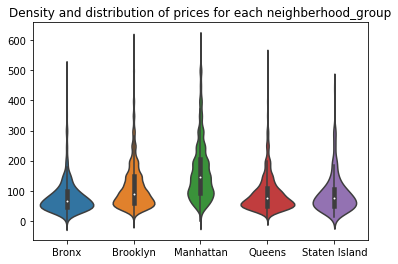

In [147]:
viz_1=sns.violinplot(data=nhood_price)
viz_1.set_title('Density and distribution of prices for each neighberhood_group')

In [159]:
# Now to be more specific we may grab the top 10 neighbourhoods
n_list = data.neighbourhood.value_counts().head(10).index
data.neighbourhood.value_counts().head(10).index

Index(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
       'Upper West Side', 'Hell's Kitchen', 'East Village', 'Upper East Side',
       'Crown Heights', 'Midtown'],
      dtype='object')

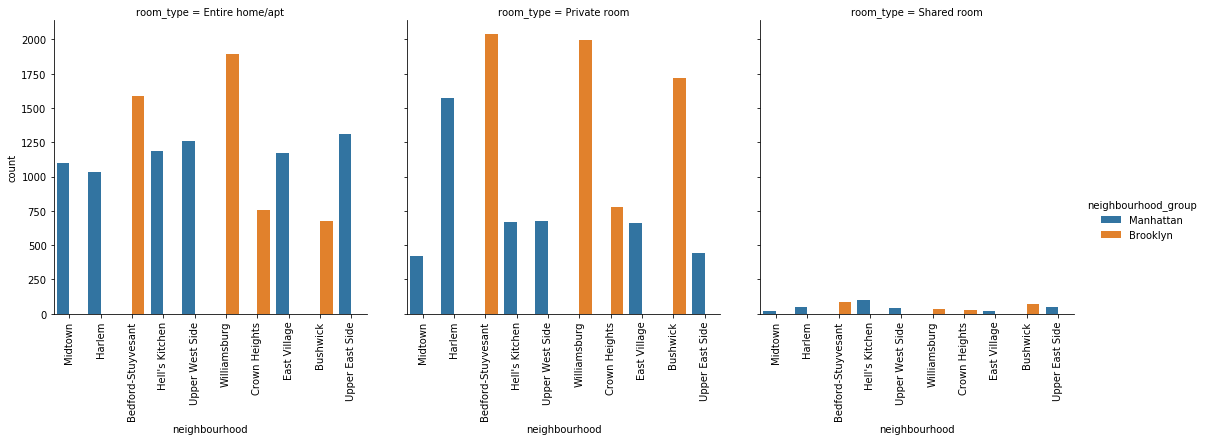

In [162]:
# and now displaying this data
top_10_nhood_data = data.loc[data['neighbourhood'].isin(n_list)]
viz_2=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=top_10_nhood_data, kind='count')
viz_2.set_xticklabels(rotation=90)
# we can see that the top 2 boroughs are Manhattan and Brooklyn with the most highly available neighbourhoods being
# Bedford and Williamsburg

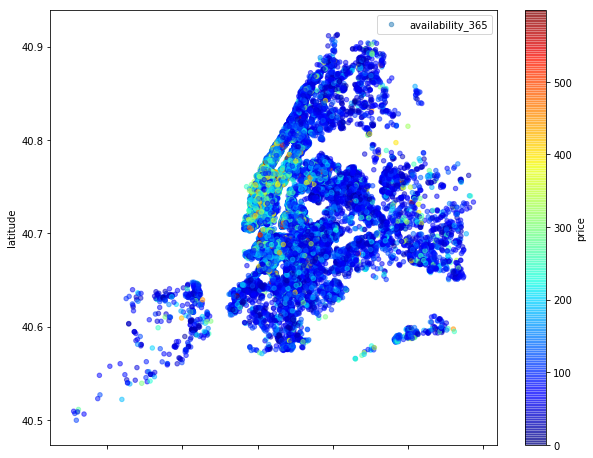

In [166]:
# Latitude and longitude are usually useful in a heatmap
viz_3=data_no_extreme_price.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.5, figsize=(10,8))
viz_3.legend()

In [211]:
#finally we proceed to analyse the name column. Extracting all words and symbols in the comlumn name
words_in_name = []
for sentence in data.name.tolist():
    for word in str(sentence).split(' '):
        words_in_name.append(str(word).lower())

[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'of'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'williamsburg'),
 Text(0, 0, 'near'),
 Text(0, 0, '-'),
 Text(0, 0, 'village'),
 Text(0, 0, 'heart'),
 Text(0, 0, 'a'),
 Text(0, 0, 'large')]

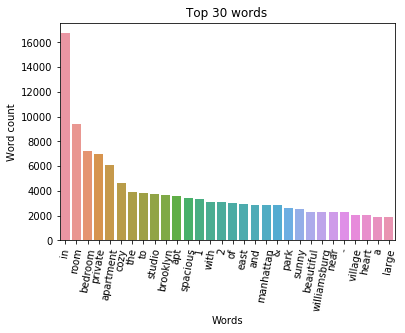

In [227]:
# Counting the words
from collections import Counter
top_30_words = Counter(words_in_name).most_common()[:30]
top_30_words = pd.DataFrame(top_30_words)
top_30_words.columns = ['words', 'count']

viz_5=sns.barplot(x='words', y='count', data=top_30_words)
viz_5.set_title('Top 30 words')
viz_5.set_ylabel('Word count')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)